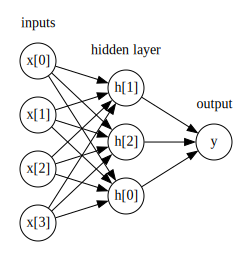

In [1]:
import mglearn
# 은닉층이 1개인 인공신경망
mglearn.plots.plot_single_hidden_layer_graph()

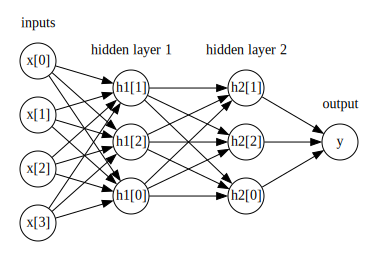

In [2]:
#은닉층이 2개인 인공신경망
mglearn.plots.plot_two_hidden_layer_graph()

In [3]:
from sklearn.datasets import make_moons
# noise 표준편차
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=0)

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=0, max_iter=5000).fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

0.925
0.9


Text(0, 0.5, '특성 1')

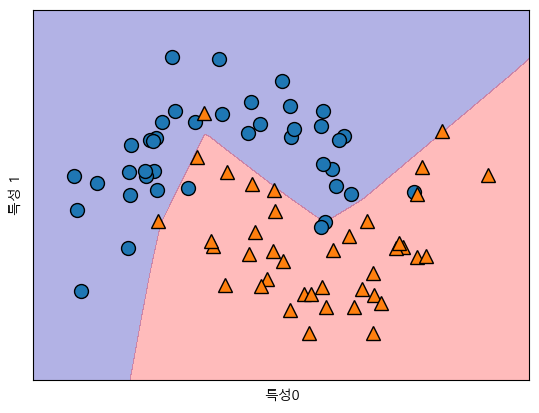

In [6]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성0')
plt.ylabel("특성 1")

0.85
0.85


Text(0, 0.5, '특성 1')

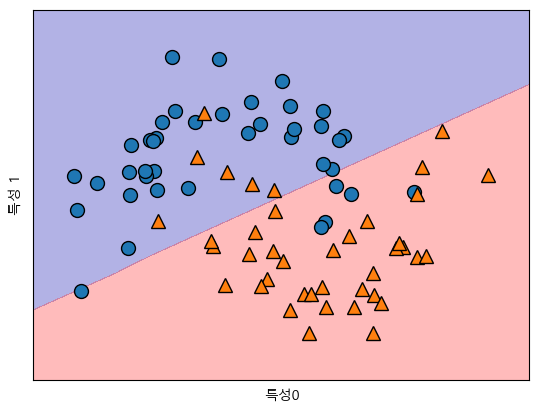

In [11]:
# 은닉유닛을 10개로 줄이고 테스트
model = MLPClassifier(random_state=0, hidden_layer_sizes=[10], max_iter=5000).fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성0')
plt.ylabel("특성 1")

c:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8625
0.85


Text(0, 0.5, '특성 1')

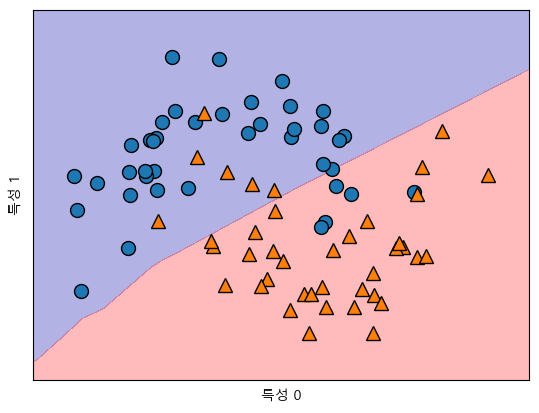

In [9]:
# 10개의 유닛으로 된 두 개의 은닉층 [10,10]
model = MLPClassifier(random_state=0, hidden_layer_sizes=[10, 10])
model.fit(X_train, y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

c:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.975
1.0


Text(0, 0.5, '특성 1')

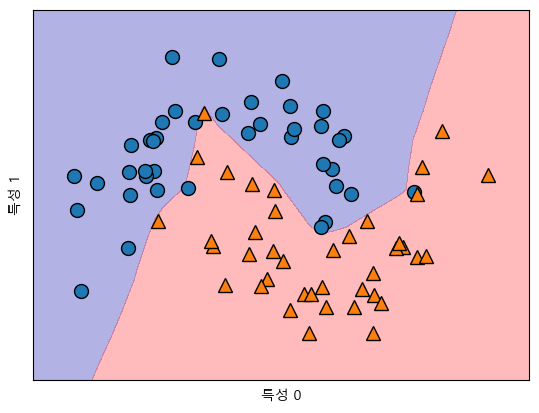

In [12]:
# 100개의 유닛으로 된 세 개의 은닉층 [100,100,100]
model = MLPClassifier(random_state=0,
hidden_layer_sizes=[100,100,100])
model.fit(X_train, y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#### 퍼셉트론

* 단층 퍼셉트론

In [13]:
import numpy as np

def AND(x1,x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x)+b
    print(tmp)
    if tmp <= 0:
        return 0
    else:
        return 1
        
for xs in [(0,0), (1,0), (0,1), (1,1)]:
    y = AND(xs[0], xs[1])
    print(xs, '->', y)

-0.7
(0, 0) -> 0
-0.19999999999999996
(1, 0) -> 0
-0.19999999999999996
(0, 1) -> 0
0.30000000000000004
(1, 1) -> 1


In [15]:
# NAND : AND의 역산(Not AND)
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) #and와 부호가 다름
    b = 0.7 #and와 부호가 다름
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = NAND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


In [16]:
# or
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2 #and와 값이 다름
    tmp = np.sum(w*x) + b
    print(tmp)
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

-0.2
(0, 0) -> 0
0.3
(1, 0) -> 1
0.3
(0, 1) -> 1
0.8
(1, 1) -> 1


* 다층 퍼셉트론

In [17]:
#퍼셉트론의 한계 : xor를 풀 수는 없다. 하지만 게이트를 조합하면 가능
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

-0.2
-0.19999999999999996
(0, 0) -> 0
0.3
0.30000000000000004
(1, 0) -> 1
0.3
0.30000000000000004
(0, 1) -> 1
0.8
-0.19999999999999996
(1, 1) -> 0
